# Домашнее задание 1
## Sentiment Analysis in English

*deadline*: 1 октября 2024, 23:59

В этом домашнем задании вы будете работать с корпусом текстов на английском языке. Корпус описан и представлен по ссылке: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis.


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание оформляется в виде отчета в jupyter-тетрадке.
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали.
4. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
5. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки.
6. За каждую неделю просрочки после дедлайна начисляет по 1 штрафному баллу (например, при дедлайне 01.10.24 в 23:59 сдача ДЗ 12.10.24 ведёт к 2 штрафным баллам).
7. Бонусные баллы позволяют повысить общую оценку за ДЗ до максимальной (если были ошибки или недочеты, повлекшие снижение баллов).


:**Сюда нужно будет написать кто что конкретно выполнил**



## Часть 1. [2 балла] Эксплоративный анализ
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)


In [ ]:
# импортруем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# загрузим датасет
df = pd.read_csv('data.csv')
df.sample(5)

,Sentence,Sentiment
704,The combined capital of these funds is expecte...,neutral
1061,Operating profit was EUR 1.6 mn in 2005 compar...,neutral
696,INTERNET BUSINESS NEWS - -® 1995-2006 M2 COMMU...,neutral
1254,It is part of the development of the world-cla...,neutral
5607,Performance in the second half of 2009 exceede...,positive


In [ ]:
# удалим из все текстов разметку <br />, сделаем все буквы строчными
from nltk.tokenize import RegexpTokenizer
import re

for i, row in df.iterrows():
  try:
    row.Sentence = re.sub('\<br /\>', '', row.Sentence).lower()
  except:
    continue

In [ ]:
df['Sentence'] = df['Sentence'].str.replace(r'http://\S+', '', regex=True)
df['Sentence'] = df['Sentence'].str.replace(r'`', '', regex=True)

In [ ]:
df.sample(20)

,Sentence,Sentiment
3435,alfa group will have 43.9 % of voting stock in...,neutral
519,it also confirmed its earnings guidance for th...,neutral
2500,"aspocomp group , headquartered in helsinki , f...",neutral
4454,rt @tomhend777 $mu needs to hold here -broken ...,neutral
337,westpac banking corp - is to issue a benchmark...,neutral
2759,companies evaluated in the report include alad...,neutral
2529,"capman , an asset manager , has eur 3bn worth ...",neutral
2388,turnover surged to eur61 .8 m from eur47 .6 m ...,positive
3384,ab inbev approaches sabmiller to explore $250b...,positive
5439,construction is scheduled to start in april-ju...,neutral


В таблице выше видим, что в датасете всего 50000 текстов отзывов, которые размечены по признаку эмоциональной окраски: позитивной и негативной.

In [ ]:
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# создадим корпус слов без учета стоп-слов, где все слова состоят только из букв
noise = stopwords.words('english')

def create_corpus(df):
  corpus = []
  for Sentence in df.Sentence:
    for token in word_tokenize(Sentence):
      if token not in noise and token.isalpha():
        corpus.append(token)
  return corpus

corpus = create_corpus(df)
print('len of corpus', len(corpus))
print('start of corpus', corpus[:10])

len of corpus 62774
start of corpus ['geosolutions', 'technology', 'leverage', 'benefon', 'gps', 'solutions', 'providing', 'location', 'based', 'search']


In [ ]:
def sorted_frequency(corpus):
  # находим частоту слов в текстах
  freq_dict = Counter(corpus)
  # сортируем слова по частоте
  freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
  return [item[0] for item in freq_dict_sorted], dict(freq_dict_sorted)

sorted_freq = sorted_frequency(corpus)[0]
print('number of unique words:', len(sorted_freq))
top300 = sorted_freq[:300]
print('top frequency')
print('len:', len(top300))
print(top300)

number of unique words: 9537
top frequency
len: 300
['eur', 'company', 'mn', 'profit', 'sales', 'finnish', 'said', 'net', 'million', 'operating', 'mln', 'period', 'year', 'group', 'finland', 'quarter', 'share', 'new', 'oyj', 'business', 'first', 'market', 'shares', 'loss', 'also', 'today', 'compared', 'services', 'euro', 'helsinki', 'corresponding', 'per', 'operations', 'percent', 'total', 'contract', 'financial', 'price', 'https', 'bank', 'decreased', 'nokia', 'products', 'hel', 'stock', 'corporation', 'according', 'pct', 'capital', 'production', 'increased', 'mobile', 'plant', 'companies', 'last', 'well', 'solutions', 'earlier', 'value', 'technology', 'rose', 'investment', 'omx', 'result', 'plc', 'deal', 'unit', 'third', 'would', 'fell', 'increase', 'service', 'order', 'second', 'construction', 'customers', 'board', 'building', 'ceo', 'billion', 'aapl', 'part', 'half', 'industry', 'expected', 'usd', 'earnings', 'oy', 'growth', 'agreement', 'maker', 'one', 'long', 'development', 'syst

In [ ]:
# найдем частоту для слов внутри позитивной тональности
corpus_pos = create_corpus(df[df.Sentiment == 'positive'])
top_pos, freq_pos = sorted_frequency(corpus_pos)
print('top frequency of positive category')
print(top_pos[:20])

top frequency of positive category
['eur', 'mn', 'sales', 'company', 'profit', 'net', 'said', 'finnish', 'million', 'year', 'period', 'mln', 'operating', 'quarter', 'group', 'new', 'rose', 'increased', 'oyj', 'today']


In [ ]:
# найдем частоту для слов внутри негативной тональности
corpus_neg = create_corpus(df[df.Sentiment == 'negative'])
top_neg, freq_neg = sorted_frequency(corpus_neg)
print('top frequency of negative category')
print(top_neg[:20])

top frequency of negative category
['eur', 'mn', 'profit', 'sales', 'net', 'finnish', 'operating', 'company', 'million', 'period', 'quarter', 'loss', 'year', 'mln', 'said', 'compared', 'decreased', 'first', 'https', 'share']


In [ ]:
# составим общий DataFrame  с частотами слов внутри позитивной и негативной тональности
freq_df = pd.DataFrame.from_dict(freq_pos, orient='index', columns=['positive'])
add_df_vals = []
for word, _ in freq_df.iterrows():
  if word in freq_neg:
    add_df_vals.append(freq_neg[word])
  else:
    add_df_vals.append(0)
freq_df['negative'] = add_df_vals
for word, val in freq_neg.items():
  if word not in freq_pos:
    freq_df.loc[word] = [0, val]
freq_df['positive'] /= sum(freq_df['positive'])
freq_df['negative'] /= sum(freq_df['negative'])
freq_df

,positive,negative
eur,0.022249,0.036133
mn,0.012196,0.025561
sales,0.011023,0.012199
company,0.010359,0.009295
profit,0.010308,0.017892
...,...,...
bobe,0.000000,0.000116
acad,0.000000,0.000116
plunged,0.000000,0.000116
charge,0.000000,0.000116


In [ ]:
freq_df.head(50)

,positive,negative
eur,0.022249,0.036133
mn,0.012196,0.025561
sales,0.011023,0.012199
company,0.010359,0.009295
profit,0.010308,0.017892
net,0.010053,0.011618
said,0.009900,0.007436
finnish,0.009032,0.010340
million,0.008369,0.009179
year,0.007348,0.008017


In [ ]:
# отсортируем по разницы частот слов в разных тональностях
print('words sorted by frequency difference')
print('positive', sorted(freq_df.index, key = lambda word: freq_df.loc[word].positive - freq_df.loc[word].negative, reverse=True))
print('negative', sorted(freq_df.index, key = lambda word: freq_df.loc[word].negative - freq_df.loc[word].positive, reverse=True))

words sorted by frequency difference
positive ['rose', 'increase', 'increased', 'new', 'long', 'services', 'buy', 'business', 'said', 'agreement', 'signed', 'order', 'growth', 'group', 'grew', 'strong', 'positive', 'also', 'awarded', 'percent', 'line', 'plc', 'supply', 'good', 'technology', 'rise', 'service', 'contract', 'higher', 'position', 'customers', 'deal', 'acquisition', 'nokia', 'mobile', 'company', 'improved', 'calls', 'well', 'solutions', 'bullish', 'ceo', 'global', 'corporation', 'offer', 'says', 'respectively', 'breakout', 'significant', 'china', 'operations', 'narrowed', 'markets', 'russia', 'uk', 'provider', 'improve', 'stake', 'cooperation', 'expand', 'looking', 'network', 'base', 'board', 'volume', 'largest', 'equipment', 'focus', 'deliver', 'expansion', 'expected', 'world', 'run', 'development', 'solution', 'engineering', 'savings', 'manufacturing', 'yhoo', 'transaction', 'aims', 'able', 'provide', 'press', 'double', 'worth', 'inbev', 'plant', 'head', 'received', 'yest

## Часть 2. [2 балла] Модели представления слов
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели.
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).


In [ ]:
# импортируем необходимые библиотеки
# выбрали word2vec, т.к. ее использовали на семинаре
import gensim
import string

from gensim.models import word2vec

In [ ]:
def create_corpus_version2(df):
  corpus = []
  for Sentence in df.Sentence:
    temp = []
    for token in word_tokenize(Sentence):
      if token not in noise and token.isalpha():
        temp.append(token)
    corpus.append(temp)
  return corpus

sentences = create_corpus_version2(df)

In [ ]:
# Обучаем модель на материале корпуса
model = word2vec.Word2Vec(sentences, workers=4, vector_size=300, min_count=10, window=10, sample=1e-3)

In [ ]:
model = word2vec.Word2Vec(sentences,
                          workers=4,
                          vector_size=200,  # Уменьшим размер вектора
                          min_count=2,  # Понизим минимальный порог для частоты слов
                          window=7,  # Уменьшим размер окна
                          sample=1e-4,  # Стандартная частота семплирования
                          sg=1,  # Оставляем skip-gram (или можно попробовать sg=0 для CBOW)
                          hs=0,  # Отключаем softmax (оставляем негативное семплирование)
                          negative=5,  # Уменьшаем количество негативных примеров
                          ns_exponent=0.75,  # Можно понизить до 0.5 для другой динамики
                          alpha=0.03,  # Увеличиваем начальную скорость обучения
                          min_alpha=0.0007,  # Поддерживаем минимальную скорость обучения выше
                          epochs=50)  # Увеличиваем количество эпох


In [ ]:
# Сохраняем веса модели
model.save("word2vec.model")

In [ ]:
cur_list = [word for word, sim in model.wv.most_similar(positive=["market", "investment"], negative=["debt"], topn=3)]
print("Associations of words market - debt + investment are: ", ', '.join(cur_list))

Associations of words market - debt + investment are:  engineer, homes, commitment


In [ ]:
# ассоциации
cur_list = [word for word, sim in model.wv.most_similar(positive=["company", "profit"], negative=["loss"], topn=3)]
print("Associations of words company - loss + profit are: ", ', '.join(cur_list))
cur_list = [word for word, sim in model.wv.most_similar(positive=["share", "growth"], negative=["decrease"], topn=3)]
print("Associations of words share - decrease + growth are: ", ', '.join(cur_list))
cur_list = [word for word, sim in model.wv.most_similar(positive=["market", "investment"], negative=["debt"], topn=3)]
print("Associations of words market - debt + investment are: ", ', '.join(cur_list))

# синонимы
print("=======")
print("Synonyms of the word decrease are: ", ', '.join([word for word, sim in model.wv.most_similar('decrease', topn=3)]))
print("Synonyms of the word increase are: ", ', '.join([word for word, sim in model.wv.most_similar('increase', topn=3)]))
print("Synonyms of the word money are: ", ', '.join([word for word, sim in model.wv.most_similar('money', topn=3)]))

# лишние слова
print("=======")
print("The word that doesn't fit with [classic, romance, show] is: ", model.wv.doesnt_match("classic romance show".split()))
print("The word that doesn't fit with [love, romance, violence] is: ", model.wv.doesnt_match("love romance violence".split()))
print("The word that doesn't fit with [violence, drug, crime, smile] is: ", model.wv.doesnt_match("violence drug crime smile".split()))

Associations of words company - loss + profit are:  finnish, net, eur
Associations of words share - decrease + growth are:  slumps, perkins, eps
Associations of words market - debt + investment are:  engineer, homes, commitment
Synonyms of the word decrease are:  distributable, repurchases, grodno
Synonyms of the word increase are:  warrants, registered, avc
Synonyms of the word money are:  bbby, popping, everything
The word that doesn't fit with [classic, romance, show] is:  show
The word that doesn't fit with [love, romance, violence] is:  love
The word that doesn't fit with [violence, drug, crime, smile] is:  drug


ВИЗУАЛИЗАЦИЯ

In [ ]:
top300_vec = []
for word in top300:
    if word in model.wv:
        top300_vec.append(model.wv[word])
    else:
        continue

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50, metric='cosine').fit_transform(np.array(top300_vec))

In [ ]:
tsne_df = pd.DataFrame(tsne, columns = ['x', 'y'])
tsne_df['word'] = top300
tsne_df

,x,y,word
0,0.601404,2.971218,eur
1,3.274369,1.588621,company
2,0.068384,2.876638,mn
3,0.577820,2.768471,profit
4,-0.631464,2.548063,sales
...,...,...,...
295,-1.811366,-0.150967,sold
296,-2.796996,-0.895465,cut
297,-6.057691,-1.144730,like
298,-3.317388,-2.261014,demand


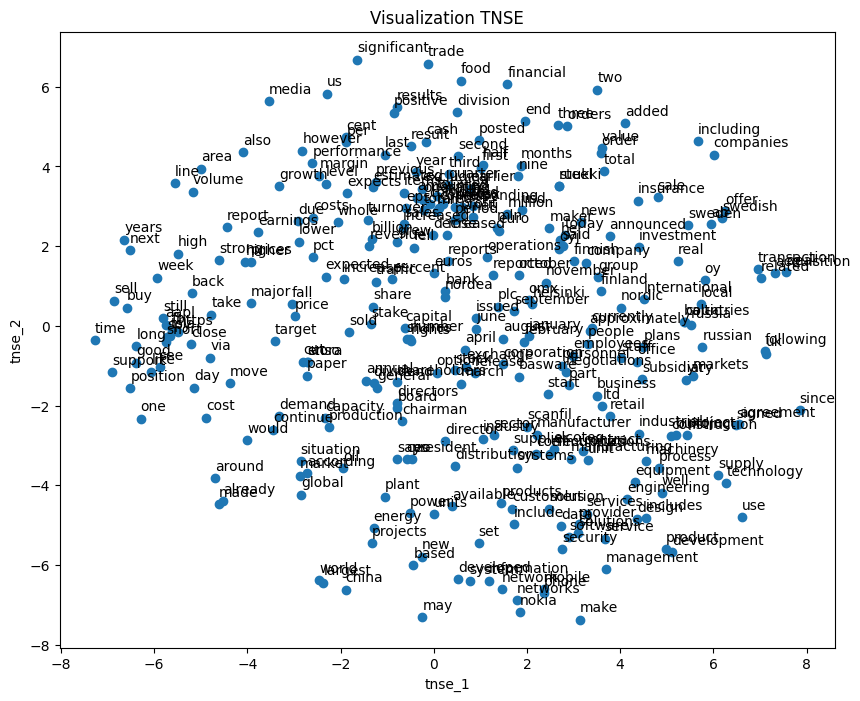

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df.x, tsne_df.y)
for i in range(tsne_df.shape[0]):
    plt.annotate(tsne_df.word[i], (tsne_df.x[i], tsne_df.y[i] + 0.2))
plt.title("Visualization TNSE")
plt.xlabel("tnse_1")
plt.ylabel("tnse_2")
plt.show()

## Часть 3. [5 баллов] Классификация текстов
В этой задаче требуется по тексту (Sentence в датасете) предсказать его тональность (Sentiment в датасете). Основная мера качества – macro $F_1$.

Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

0. [0 баллов] Разбейте корпус на три выборки: обучающую, отладочную и тестовую в соотношении 80 %, 10 % и 10 %. Тестовая выборка должна использоваться исключительно для тестирования моделей, обучающая и отладочная — для выбора модели и параметров.
1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling.
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше бейслайна.



In [ ]:
! git clone https://github.com/facebookresearch/fastText.git
! pip3 install fastText/.

fatal: destination path 'fastText' already exists and is not an empty directory.
Processing ./fastText
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4296147 sha256=12d58457b868ad3328aff9151fa249fc3bd7d1e9566f95a39e30daa85244627a
  Stored in directory: /tmp/pip-ephem-wheel-cache-gvj4x_gy/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully built fasttext
  Attempting uninstall: fasttext
    Found existing installation: fasttext 0.9.2
    Uninstalling fasttext-0.9.2:
      Successfully uninstalled fasttext-0.9.2


In [ ]:
from sklearn import metrics
import fasttext
import os
import torch
from collections import defaultdict
from tqdm import tqdm_notebook

In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% train, 10% validation, 10% test
train_data, temp_data = train_test_split(df, test_size=0.2, stratify=df['Sentiment'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Sentiment'], random_state=42)

# Check the distribution of sentiments in each split
train_dist = train_data['Sentiment'].value_counts(normalize=True)
val_dist = val_data['Sentiment'].value_counts(normalize=True)
test_dist = test_data['Sentiment'].value_counts(normalize=True)

train_dist, val_dist, test_dist


(Sentiment
 neutral     0.535844
 positive    0.316927
 negative    0.147229
 Name: proportion, dtype: float64,
 Sentiment
 neutral     0.535959
 positive    0.316781
 negative    0.147260
 Name: proportion, dtype: float64,
 Sentiment
 neutral     0.535043
 positive    0.317949
 negative    0.147009
 Name: proportion, dtype: float64)

In [ ]:
# Preparing data for fastText (writing to a text file as fastText uses text inputs for training)
train_file = 'train_fasttext.txt'
val_file = 'val_fasttext.txt'
test_file = 'test_fasttext.txt'

# Convert the data into fastText format: __label__Sentiment Sentence
def prepare_fasttext_format(data, file_path):
    with open(file_path, 'w') as f:
        for _, row in data.iterrows():
            f.write(f'__label__{row["Sentiment"]} {row["Sentence"]}\n')

# Prepare train, validation, and test data
prepare_fasttext_format(train_data, train_file)
prepare_fasttext_format(val_data, val_file)
prepare_fasttext_format(test_data, test_file)

train_file, val_file, test_file


('train_fasttext.txt', 'val_fasttext.txt', 'test_fasttext.txt')

In [ ]:
from sklearn.utils import resample

# Разделение данных по классам
neutral = train_data[train_data['Sentiment'] == 'neutral']
positive = train_data[train_data['Sentiment'] == 'positive']
negative = train_data[train_data['Sentiment'] == 'negative']

# Определяем максимальный размер класса (чтобы сделать все классы одинаковыми по количеству)
max_size = len(neutral)

# Применяем oversampling для классов positive и negative
positive_upsampled = resample(positive, replace=True, n_samples=max_size, random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=max_size, random_state=42)

# Объединяем заново данные, создавая сбалансированный датасет
train_data = pd.concat([neutral, positive_upsampled, negative_upsampled])

# Перемешиваем данные после oversampling
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем новые размеры классов
print(train_data['Sentiment'].value_counts())



Sentiment
positive    2504
negative    2504
neutral     2504
Name: count, dtype: int64


In [ ]:
# Функция для очистки данных от пустых строк и пропущенных меток
def clean_data(x, y):
    # Удаляем строки, где 'Sentence' или 'Sentiment' пустые
    clean_x = x[~x.isnull() & (x != '')]
    clean_y = y.loc[clean_x.index]
    return clean_x, clean_y


# Добавляем префикс для меток fastText
label_prefix = '__label__'

# Функция для создания input файлов для fastText
def create_ft_input(filename, x, y, label_prefix=label_prefix):
    with open(filename, 'w') as f:
        for i in range(len(x)):
            line = label_prefix + y.iloc[i] + ' ' + x.iloc[i] + '\n'
            f.write(line)

# Разделение данных на предложения и метки
train_x, train_y = train_data['Sentence'], train_data['Sentiment']
dev_x, dev_y = df['Sentence'], df['Sentiment']
test_x, test_y = test_data['Sentence'], test_data['Sentiment']
# Очистка данных
train_x_clean, train_y_clean = clean_data(train_x, train_y)
dev_x_clean, dev_y_clean = clean_data(dev_x, dev_y)
test_x_clean, test_y_clean = clean_data(test_x, test_y)

# Функция для тестирования модели fastText
def test_ftmodel(model, valid_x, valid_y, test=None):
    predictions = []
    for i in range(len(valid_x)):
        predictions.append(model.predict(valid_x.iloc[i])[0][0][len(label_prefix):])

    labels = ['positive', 'neutral', 'negative']
    if test is not None:
        labels = [test]
    return metrics.f1_score(list(valid_y), predictions, average='macro', labels=labels)
# Создание файлов для тренировки
create_ft_input('train_ft_input.txt', train_x_clean, train_y_clean)

# Обучение модели fastText
ft_model = fasttext.train_supervised('train_ft_input.txt')

# Оценка модели на dev и test данных
print('macro F1 score on dev data:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean))
print('macro F1 score on test data:', test_ftmodel(ft_model, test_x_clean, test_y_clean))

# F1 score для положительных и отрицательных отзывов на dev данных
print('F1 score on dev data for positive reviews:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean, 'positive'))
print('F1 score on dev data for negative reviews:', test_ftmodel(ft_model, dev_x_clean, dev_y_clean, 'negative'))


macro F1 score on dev data: 0.7604558207378375
macro F1 score on test data: 0.653738800484733
F1 score on dev data for positive reviews: 0.8056417489421721
F1 score on dev data for negative reviews: 0.6420345489443378


In [ ]:
# Разделение данных по меткам для расчетов Precision и Recall
pos_dev_x = dev_x[dev_y == 'positive']
pos_dev_y = dev_y[dev_y == 'positive']
neg_dev_x = dev_x[dev_y == 'negative']
neg_dev_y = dev_y[dev_y == 'negative']

# Создание файлов для положительных и отрицательных отзывов
create_ft_input('pos_dev_input.txt', pos_dev_x, pos_dev_y)
_, pos_prec, pos_rec = ft_model.test('pos_dev_input.txt')

create_ft_input('neg_dev_input.txt', neg_dev_x, neg_dev_y)
_, neg_prec, neg_rec = ft_model.test('neg_dev_input.txt')

# Вывод Precision и Recall для положительных и отрицательных отзывов
print('Precision on positive reviews:', pos_prec)
print('Recall on positive reviews:', pos_rec)

print('Precision on negative reviews:', neg_prec)
print('Recall on negative reviews:', neg_rec)


Precision on positive reviews: 0.7710583153347732
Recall on positive reviews: 0.7710583153347732
Precision on negative reviews: 0.7779069767441861
Recall on negative reviews: 0.7779069767441861


In [ ]:
%%time
URL = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip"
FILE = "fastTextVectors"

if os.path.isdir(FILE):
    print("Vectors already downloaded.")
else:
    !wget -P $FILE $URL
    !unzip $FILE/crawl-300d-2M.vec.zip -d $FILE

Vectors already downloaded.
CPU times: user 115 µs, sys: 4 µs, total: 119 µs
Wall time: 99.9 µs


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
import os
import fasttext
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Проверка доступности GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

# 1. Токенизация текста и построение словаря
def tokenize(texts):
    max_len = 0
    tokenized_texts = []
    word2idx = {'<pad>': 0, '<unk>': 1}  # Начинаем с токенов <pad> и <unk>
    idx = 2  # Начальный индекс для новых токенов

    for text in texts:
        tokenized_text = text.split()  # Простая токенизация (можно улучшить)
        tokenized_texts.append(tokenized_text)

        # Добавляем токены в словарь
        for token in tokenized_text:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        max_len = max(max_len, len(tokenized_text))

    return tokenized_texts, word2idx, max_len
'''
# 2. Преобразование текста в индексы
def encode(tokenized_texts, word2idx, max_len):
    input_ids = []
    for tokenized_text in tokenized_texts:
        tokenized_text += ['<pad>'] * (max_len - len(tokenized_text))  # Паддинг до max_len
        input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)
    return np.array(input_ids, dtype=np.int32)
'''
def encode(tokenized_texts, word2idx, max_len):
    input_ids = []
    for tokenized_text in tokenized_texts:
        # Ensure tokenized_text is a list of tokens (not a string)
        if isinstance(tokenized_text, str):
            tokenized_text = word_tokenize(tokenized_text)

        # Truncate if longer than max_len
        tokenized_text = tokenized_text[:max_len]

        # Pad with '<pad>' if shorter than max_len
        tokenized_text += ['<pad>'] * (max_len - len(tokenized_text))

        # Convert tokens to their corresponding indices
        input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)

    return input_ids


# 3. Загрузка предобученных векторов fastText
def load_pretrained_vectors(word2idx, fname):
    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())

    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))  # Инициализируем случайными векторами
    embeddings[word2idx['<pad>']] = np.zeros((d,))  # Вектор паддинга

    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")
    return embeddings

# 4. Подготовка данных
train_x, train_y = train_data['Sentence'], train_data['Sentiment']
dev_x, dev_y = df['Sentence'], df['Sentiment']
test_x, test_y = test_data['Sentence'], test_data['Sentiment']

# Токенизация
print("Tokenizing...")
tokenized_texts_train, word2idx, max_len = tokenize(list(train_x))
tokenized_texts_dev, _, _ = tokenize(list(dev_x))
tokenized_texts_test, _, _ = tokenize(list(test_x))

# 1. Найдем максимальную длину для всех наборов данных (train, dev, test)
all_texts = list(train_x) + list(dev_x) + list(test_x)
tokenized_texts_all, _, max_len_all = tokenize(all_texts)

# Токенизация для каждого набора данных с использованием общего max_len
tokenized_texts_train, _, _ = tokenize(list(train_x))
tokenized_texts_dev, _, _ = tokenize(list(dev_x))
tokenized_texts_test, _, _ = tokenize(list(test_x))

# Преобразуем тексты в индексы, используя общий max_len
train_inputs = encode(tokenized_texts_train, word2idx, max_len_all)
dev_inputs = encode(tokenized_texts_dev, word2idx, max_len_all)
test_inputs = encode(tokenized_texts_test, word2idx, max_len_all)

# Загрузка предобученных векторов fastText
embeddings = load_pretrained_vectors(word2idx, "fastTextVectors/crawl-300d-2M.vec")
embeddings = torch.tensor(embeddings)

# Преобразование меток в числовой формат
def sentiment_to_label(sentiment):
    if sentiment == 'positive':
        return 2
    elif sentiment == 'neutral':
        return 1
    else:
        return 0

train_labels = [sentiment_to_label(label) for label in train_y]
dev_labels = [sentiment_to_label(label) for label in dev_y]
test_labels = [sentiment_to_label(label) for label in test_y]

# Создание тензоров
train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels = \
    tuple(torch.tensor(data) for data in [train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels])

batch_size = 50

train_data = TensorDataset(train_inputs, train_labels)
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

dev_data = TensorDataset(dev_inputs, dev_labels)
dev_dataloader = DataLoader(dev_data, shuffle=False, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_labels)
test_dataloader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

# 5. Определение CNN модели с k-max pooling
class CNN_NLP(nn.Module):
    def __init__(self, pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                 filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5):
        super(CNN_NLP, self).__init__()
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=freeze_embedding)
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=self.embed_dim, padding_idx=0)

        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim, out_channels=num_filters[i], kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])

        self.fc = nn.Linear(np.sum(num_filters) * kmax[0], num_classes)
        self.dropout = nn.Dropout(p=dropout)
        self.kmax_list = kmax

    def count_kmax(self, x, k, dim=2):
        index = x.topk(k, dim=dim)[1].sort(dim=dim)[0]
        return x.gather(dim, index)

    def forward(self, input_ids):
        x_embed = self.embedding(input_ids).float()
        x_reshaped = x_embed.permute(0, 2, 1)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]
        x_pool_list = [self.count_kmax(x_conv, self.kmax_list[i]) for i, x_conv in enumerate(x_conv_list)]
        x_fc = torch.cat([torch.flatten(x_pool, start_dim=1) for x_pool in x_pool_list], dim=1)
        logits = self.fc(self.dropout(x_fc))
        return logits

# Инициализация модели
def initilize_model(pretrained_embedding=None, freeze_embedding=False, vocab_size=None, embed_dim=300,
                    filter_sizes=[3, 4, 5], num_filters=[100, 100, 100], kmax=[1, 1, 1], num_classes=3, dropout=0.5,
                    learning_rate=0.01):
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding, freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size, embed_dim=embed_dim, filter_sizes=filter_sizes, num_filters=num_filters,
                        kmax=kmax, num_classes=num_classes, dropout=dropout)
    cnn_model.to(device)
    optimizer = optim.Adadelta(cnn_model.parameters(), lr=learning_rate, rho=0.95)
    return cnn_model, optimizer


There are 1 GPU(s) available.
Device name: Tesla T4
Tokenizing...
Loading pretrained vectors...


<ipython-input-35-a6f74f76ce7e>:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 8680 / 11610 pretrained vectors found.


====Current filter [2, 3, 4]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.029056   |  0.933733  | 0.524408  | 2.807058 
   2    |   0.821434   |  0.740833  | 0.708611  | 2.595361 
   3    |   0.682944   |  0.625188  | 0.741845  | 2.760260 
   4    |   0.592574   |  0.566543  | 0.765948  | 1.864053 
   5    |   0.536552   |  0.490751  | 0.772310  | 1.978030 
Training complete! Best f1score: 0.772310%.


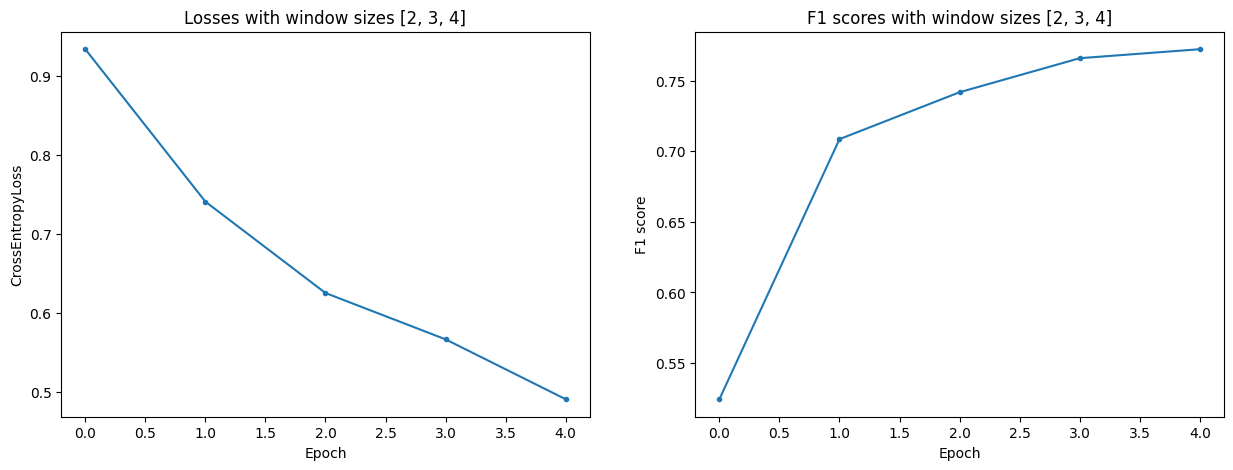

====Current filter [3, 4, 5]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.017608   |  0.936530  | 0.635871  | 2.004603 
   2    |   0.824303   |  0.765077  | 0.700533  | 2.030475 
   3    |   0.671968   |  0.634101  | 0.754779  | 2.061976 
   4    |   0.577194   |  0.567662  | 0.774115  | 2.113341 
   5    |   0.504839   |  0.510517  | 0.786074  | 2.049409 
Training complete! Best f1score: 0.786074%.


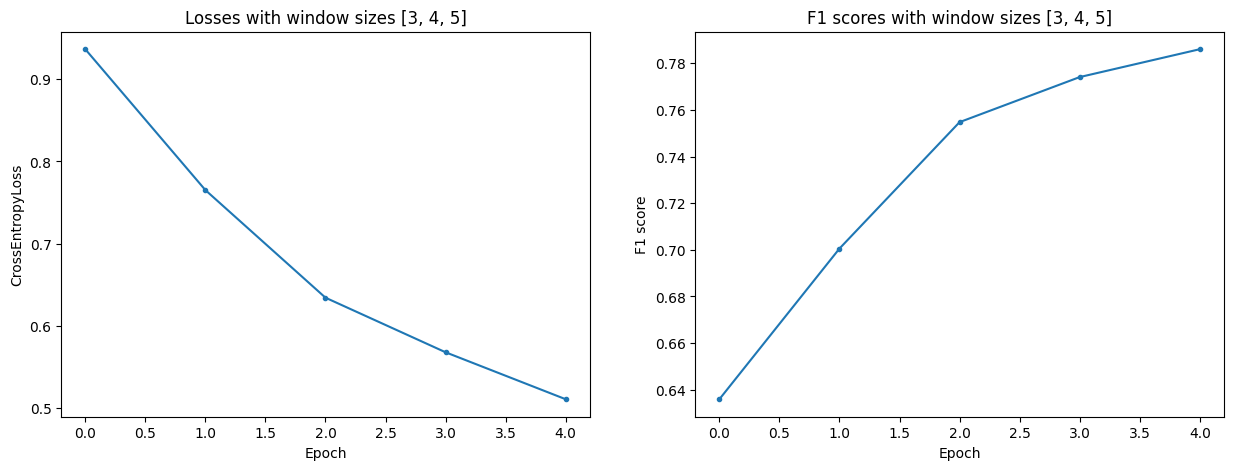

====Current filter [2, 4, 6]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.000534   |  0.864809  | 0.654603  | 2.053238 
   2    |   0.768285   |  0.684510  | 0.733310  | 2.033967 
   3    |   0.612078   |  0.571082  | 0.753670  | 1.764678 
   4    |   0.529657   |  0.540568  | 0.777082  | 1.720722 
   5    |   0.478867   |  0.478844  | 0.793469  | 1.673686 
Training complete! Best f1score: 0.793469%.


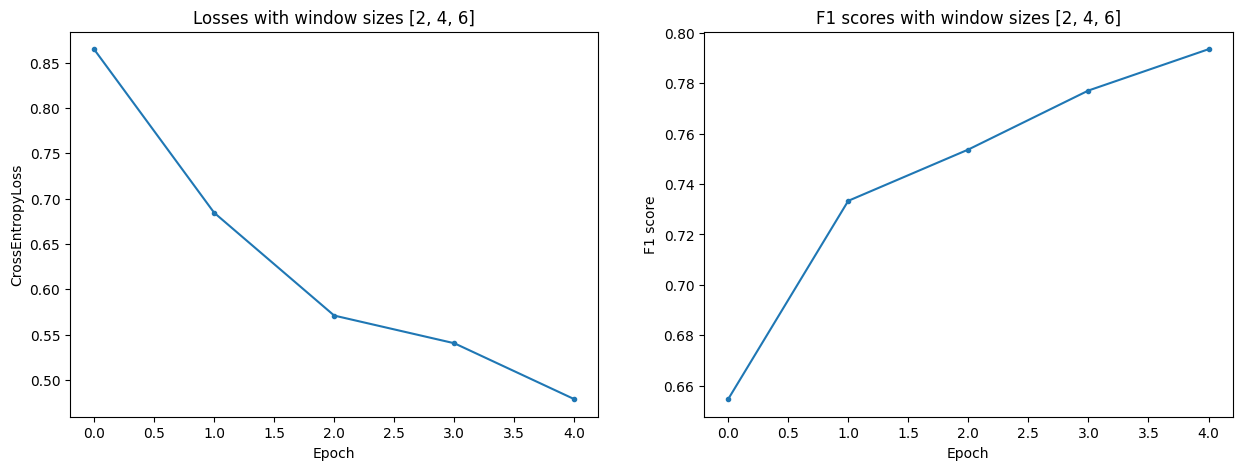

====Current filter [2, 6, 7]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.980883   |  0.831258  | 0.628797  | 1.733960 
   2    |   0.744945   |  0.655010  | 0.738400  | 1.726130 
   3    |   0.608680   |  0.562451  | 0.764210  | 1.887491 
   4    |   0.513530   |  0.502742  | 0.788718  | 1.975343 
   5    |   0.455150   |  0.468685  | 0.799360  | 2.023475 
Training complete! Best f1score: 0.799360%.


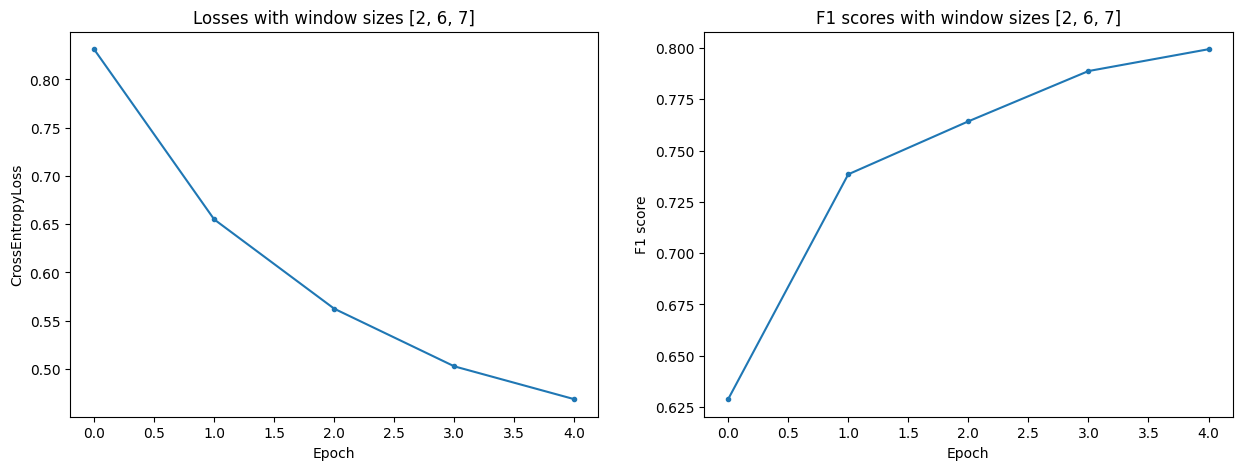

====Current filter [6, 7, 8]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.995101   |  0.870803  | 0.613767  | 2.106006 
   2    |   0.757484   |  0.656430  | 0.717897  | 2.085300 
   3    |   0.594282   |  0.578117  | 0.772819  | 2.071538 
   4    |   0.502763   |  0.499150  | 0.792326  | 2.128415 
   5    |   0.429822   |  0.432004  | 0.801271  | 2.065352 
Training complete! Best f1score: 0.801271%.


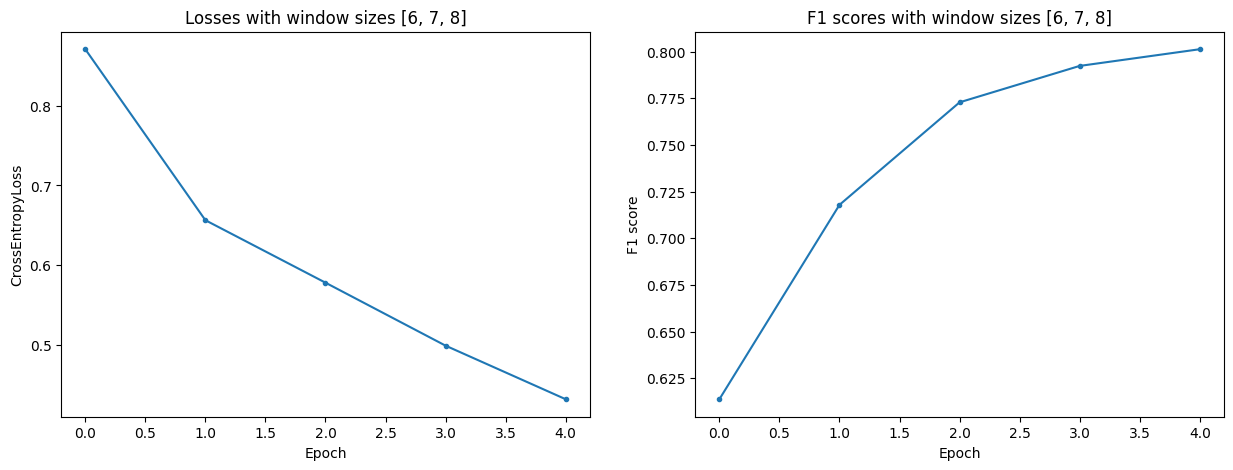

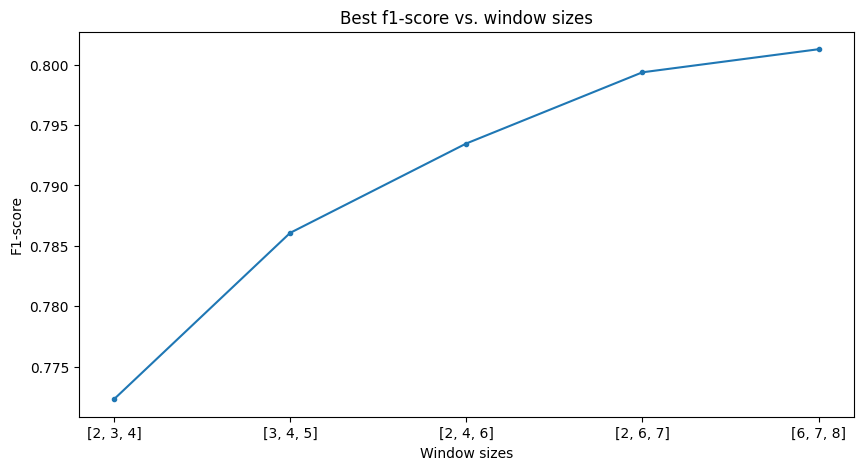

Test loss on best model: 0.6484341124693552
Test macro F1 score on best model: 0.6453607509616205


<ipython-input-37-e65e26252d2c>:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_windowsize.pt')


In [ ]:
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import metrics
import matplotlib.pyplot as plt

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    """Train the CNN model."""
    best_f1score = 0
    all_val_losses, all_val_scores = [], []

    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val f1-score':^9} | {'Elapsed':^9}")
    print("-"*60)

    for epoch_i in range(epochs):
        t0_epoch = time.time()
        total_loss = 0
        model.train()

        for step, batch in enumerate(train_dataloader):
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)
            model.zero_grad()
            logits = model(b_input_ids)
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_train_loss = total_loss / len(train_dataloader)

        # Evaluation
        if val_dataloader is not None:
            val_loss, val_f1score = evaluate(model, val_dataloader)
            all_val_losses.append(val_loss)
            all_val_scores.append(val_f1score)
            if val_f1score > best_f1score:
                best_f1score = val_f1score
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_f1score:^9.6f} | {time_elapsed:^9.6f}")

    print(f"Training complete! Best f1score: {best_f1score:.6f}%.")
    return all_val_losses, all_val_scores, best_f1score

def evaluate(model, val_dataloader):
    """Evaluate the model on validation set."""
    model.eval()
    val_f1score = []
    val_loss = []

    for batch in val_dataloader:
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)
        with torch.no_grad():
            logits = model(b_input_ids)
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())
        preds = torch.argmax(logits, dim=1).flatten()
        f1score = metrics.f1_score(b_labels.cpu(), preds.cpu(), average='macro')
        val_f1score.append(f1score)

    val_loss = np.mean(val_loss)
    val_f1score = np.mean(val_f1score)

    return val_loss, val_f1score

# Set seed for reproducibility
set_seed(42)

# Number of epochs
epochs = 5

# Window sizes for filters
windowsizes = [[2, 3, 4], [3, 4, 5], [2, 4, 6], [2, 6, 7], [6, 7, 8]]

best_scores_windowsizes = []
max_best_score = 0

for windows in windowsizes:
    print("====Current filter {}=====".format(windows))
    cnn_model, optimizer = initilize_model(pretrained_embedding=embeddings,
                                            freeze_embedding=False,
                                            filter_sizes=windows,
                                            num_filters=[10] * len(windows),  # Same number of filters for each window size
                                            kmax=[1] * len(windows),  # K-max pooling
                                            learning_rate=0.25,
                                            dropout=0.5)
    val_losses_windowsize, val_scores_windowsize, best_score_windowsize = train(cnn_model, optimizer, train_dataloader, dev_dataloader, epochs=epochs)
    best_scores_windowsizes.append(best_score_windowsize)

    if best_score_windowsize > max_best_score:
        max_best_score = best_score_windowsize
        torch.save(cnn_model, 'best_model_windowsize.pt')

    # Plotting the losses and scores
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(np.arange(epochs), val_losses_windowsize, marker='.')
    axes[0].set_title("Losses with window sizes " + str(windows))
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    axes[1].plot(np.arange(epochs), val_scores_windowsize, marker='.')
    axes[1].set_title("F1 scores with window sizes " + str(windows))
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 score")
    plt.show()

# Plotting best f1-scores for different window sizes
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(best_scores_windowsizes)), best_scores_windowsizes, marker='.')
plt.title("Best f1-score vs. window sizes")
plt.xlabel("Window sizes")
plt.ylabel("F1-score")
plt.xticks(np.arange(len(windowsizes)), [str(window) for window in windowsizes])
plt.show()

# Load and evaluate the best model on the test set
best_model = torch.load('best_model_windowsize.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)
print("Test loss on best model:", best_model_test_loss)
print("Test macro F1 score on best model:", best_model_test_f1score)


====Current filter size [3]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.150041   |  1.261017  | 0.104854  | 1.589776 
   2    |   1.067007   |  1.133520  | 0.317868  | 1.522849 
   3    |   1.008117   |  1.063328  | 0.334982  | 1.563769 
   4    |   0.973170   |  1.008933  | 0.348934  | 1.590223 
   5    |   0.942851   |  0.955114  | 0.381362  | 1.544443 
Training complete! Best f1score: 0.381362%.


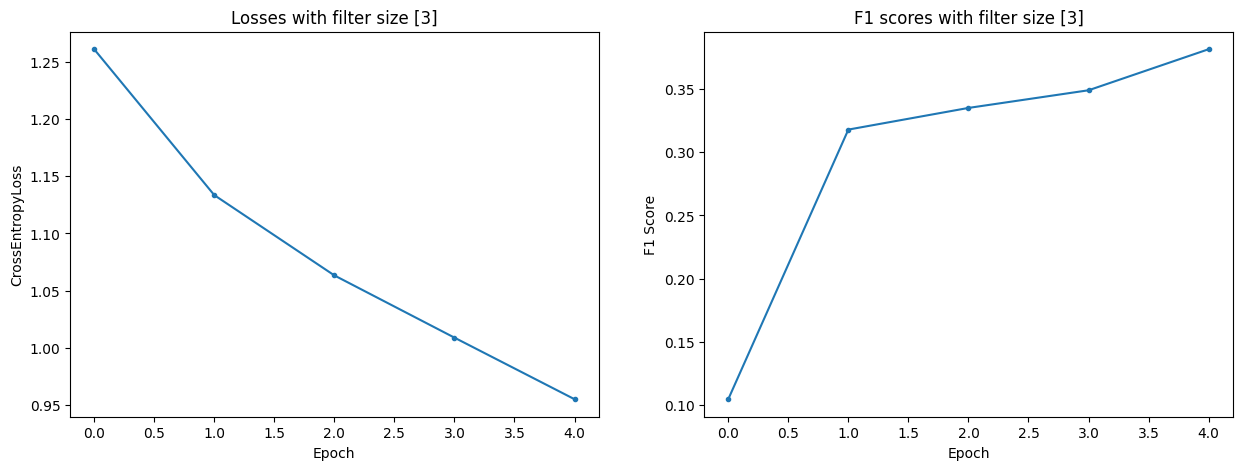

====Current filter size [3, 3]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.105086   |  0.983456  | 0.348811  | 1.859951 
   2    |   1.022235   |  0.919651  | 0.568600  | 1.846591 
   3    |   0.934378   |  0.812352  | 0.668120  | 1.848815 
   4    |   0.884194   |  0.791402  | 0.700780  | 1.807254 
   5    |   0.841038   |  0.744757  | 0.718289  | 1.788352 
Training complete! Best f1score: 0.718289%.


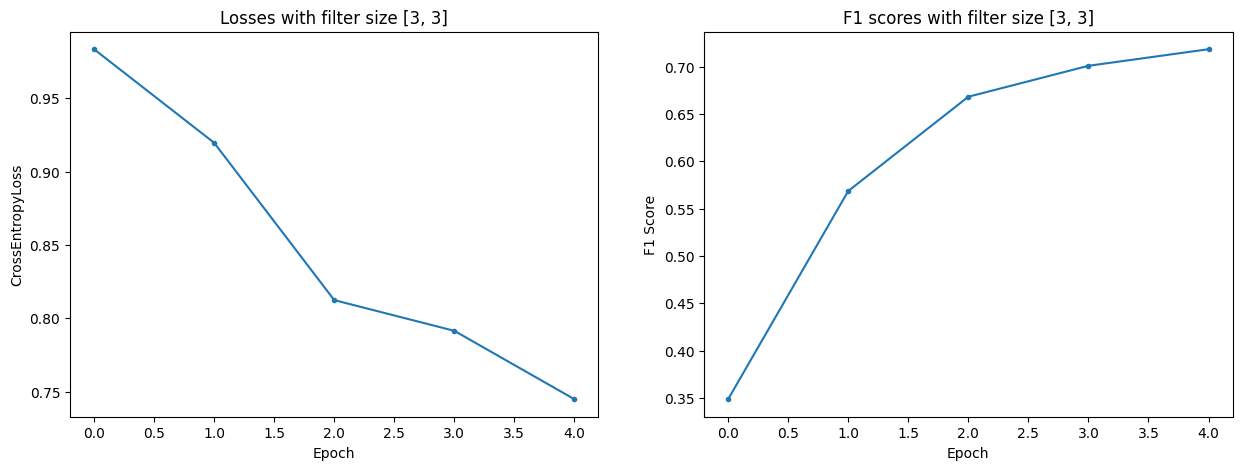

====Current filter size [3, 3, 3]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   1.076820   |  0.981081  | 0.584545  | 1.901612 
   2    |   0.951989   |  0.855208  | 0.674123  | 1.623925 
   3    |   0.860443   |  0.776171  | 0.709119  | 1.656918 
   4    |   0.800876   |  0.724684  | 0.722343  | 1.640972 
   5    |   0.766826   |  0.695298  | 0.735983  | 1.635030 
Training complete! Best f1score: 0.735983%.


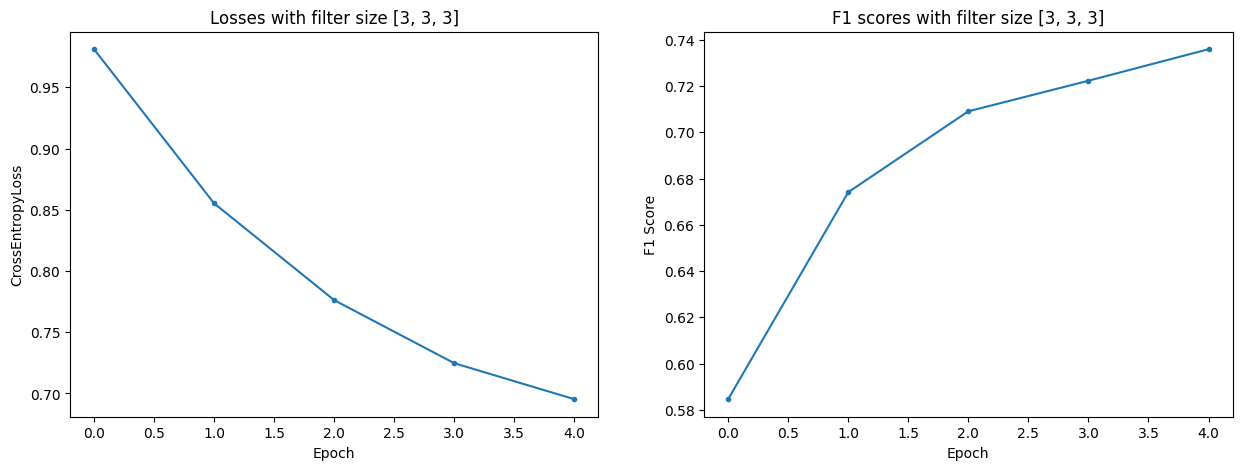

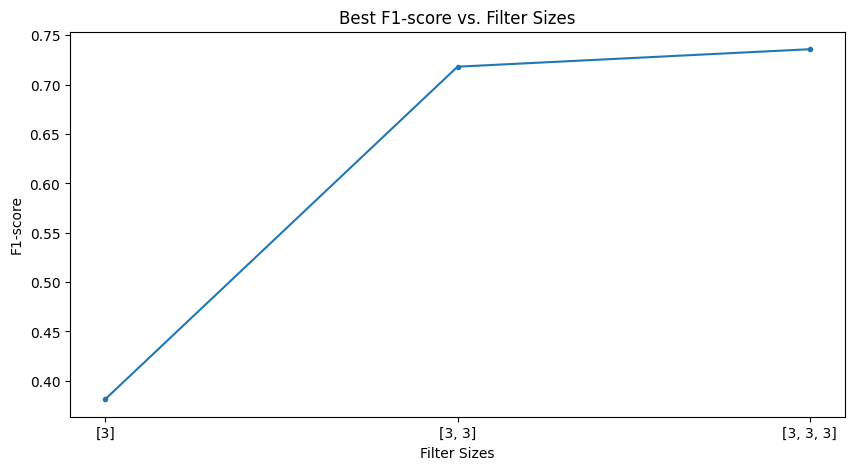

Test loss on the best model: 0.7525376031796137
Test macro F1 score on the best model: 0.6801307259088304


<ipython-input-38-1490d2641f09>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_filtersize.pt')


In [ ]:
set_seed(42)  # Set seed for reproducibility
epochs = 5  # Number of epochs
filtersizes = [[3], [3, 3], [3, 3, 3]]  # Different filter sizes to experiment with

best_scores_filtersizes = []
max_best_score = 0

# Iterate over each filter size
for filter_size in filtersizes:
    print(f"====Current filter size {filter_size}=====")

    # Initialize the model with the current filter size
    cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=filter_size,
                                                num_filters=[2 for _ in range(len(filter_size))],  # Number of filters for each size
                                                kmax=[1 for _ in range(len(filter_size))],  # K-max pooling for each filter
                                                learning_rate=0.25,
                                                dropout=0.5)

    # Train the model and evaluate on the dev set
    val_losses_filtersize, val_scores_filtersize, best_score_filtersize = train(
        cnn_non_static, optimizer, train_dataloader, dev_dataloader, epochs=epochs)

    # Store the best F1-score for the current filter size
    best_scores_filtersizes.append(best_score_filtersize)

    # Save the model with the best performance
    if best_score_filtersize > max_best_score:
        max_best_score = best_score_filtersize
        torch.save(cnn_non_static, 'best_model_filtersize.pt')

    # Plot losses and F1 scores for each filter size
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training and validation loss
    axes[0].plot(np.arange(epochs), val_losses_filtersize, marker='.')
    axes[0].set_title(f"Losses with filter size {filter_size}")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    # Plot F1 scores
    axes[1].plot(np.arange(epochs), val_scores_filtersize, marker='.')
    axes[1].set_title(f"F1 scores with filter size {filter_size}")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 Score")

    plt.show()

# Plot the best F1-scores for each filter size
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(best_scores_filtersizes)), best_scores_filtersizes, marker='.')
plt.title("Best F1-score vs. Filter Sizes")
plt.xlabel("Filter Sizes")
plt.ylabel("F1-score")
plt.xticks(np.arange(len(filtersizes)), [str(filter) for filter in filtersizes])
plt.show()

# Load and evaluate the best model on the test set
best_model = torch.load('best_model_filtersize.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)

print("Test loss on the best model:", best_model_test_loss)
print("Test macro F1 score on the best model:", best_model_test_f1score)


====Current number of filters [10, 10, 10]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.987770   |  0.820551  | 0.674774  | 1.867465 
   2    |   0.753165   |  0.653973  | 0.748129  | 1.982219 
   3    |   0.591099   |  0.527936  | 0.778749  | 2.077386 
   4    |   0.485368   |  0.496460  | 0.788799  | 2.068883 
   5    |   0.416927   |  0.443206  | 0.805134  | 2.108848 
Training complete! Best f1score: 0.805134%.


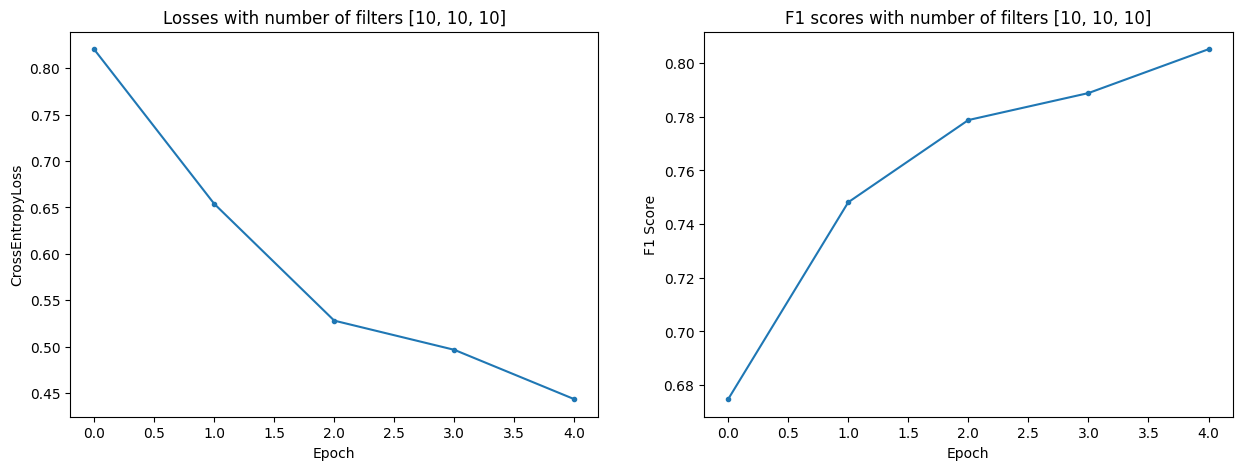

====Current number of filters [50, 50, 50]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.913999   |  0.758602  | 0.703475  | 2.406770 
   2    |   0.587511   |  0.498448  | 0.748749  | 2.317439 
   3    |   0.420848   |  0.424492  | 0.794097  | 2.320195 
   4    |   0.334730   |  0.369050  | 0.803707  | 2.292734 
   5    |   0.272708   |  0.408389  | 0.822822  | 2.078493 
Training complete! Best f1score: 0.822822%.


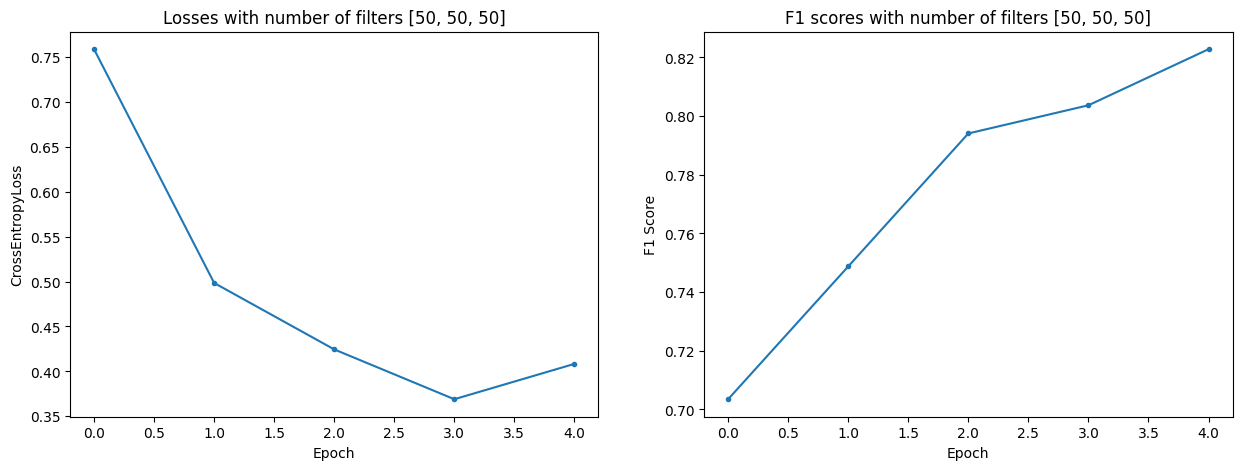

====Current number of filters [100, 100, 100]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.912838   |  0.724502  | 0.690542  | 2.479290 
   2    |   0.565733   |  0.516628  | 0.746174  | 2.479077 
   3    |   0.386949   |  0.444383  | 0.775875  | 2.473117 
   4    |   0.295069   |  0.348018  | 0.799933  | 2.633475 
   5    |   0.246576   |  0.401217  | 0.804986  | 2.661398 
Training complete! Best f1score: 0.804986%.


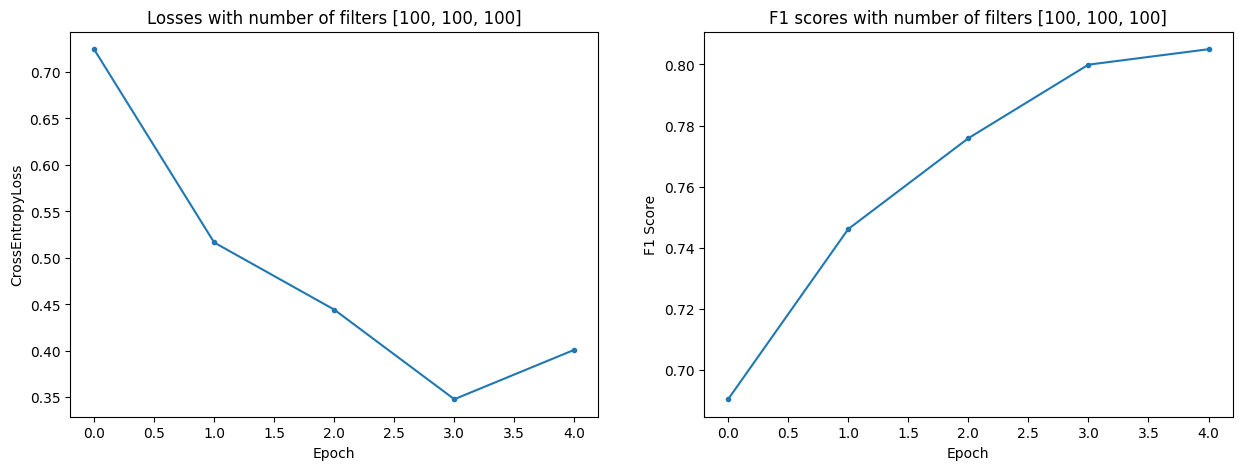

([<matplotlib.axis.XTick at 0x782f1610b250>,
 [Text(0, 0, '[10, 10, 10]'),
  Text(1, 0, '[50, 50, 50]'),
  Text(2, 0, '[100, 100, 100]')])

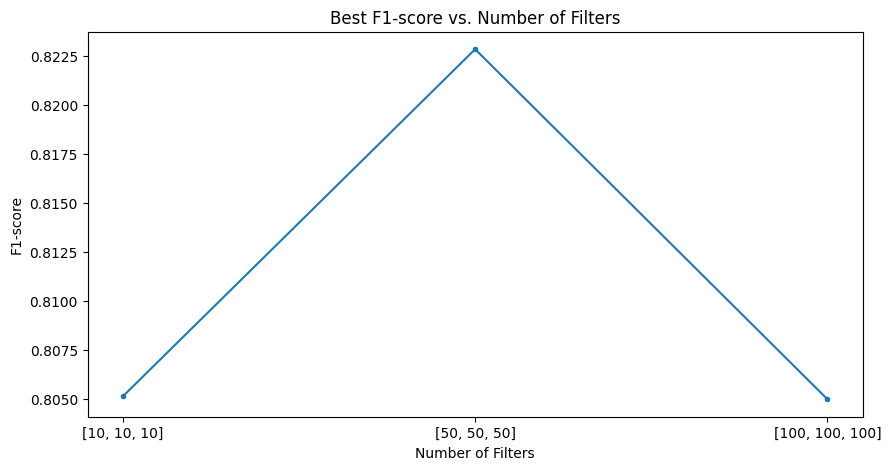

In [ ]:
set_seed(42)  # Set seed for reproducibility
epochs = 5  # Number of epochs
numfilters = [[10, 10, 10], [50, 50, 50], [100, 100, 100]]  # Different numbers of filters to experiment with

best_scores_numfilters = []
max_best_score = 0

# Iterate over each configuration of number of filters
for num_filter in numfilters:
    print(f"====Current number of filters {num_filter}=====")

    # Initialize the model with current number of filters
    cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],  # Fixed filter sizes
                                                num_filters=num_filter,  # Number of filters for each size
                                                kmax=[1, 1, 1],  # K-max pooling for each filter size
                                                learning_rate=0.25,
                                                dropout=0.5)

    # Train the model and evaluate on the validation set
    val_losses_numfilters, val_scores_numfilters, best_score_numfilters = train(
        cnn_non_static, optimizer, train_dataloader, dev_dataloader, epochs=epochs)

    # Store the best F1-score for the current number of filters
    best_scores_numfilters.append(best_score_numfilters)

    # Save the best-performing model
    if best_score_numfilters > max_best_score:
        max_best_score = best_score_numfilters
        torch.save(cnn_non_static, 'best_model_numfilters.pt')

    # Plot losses and F1 scores for the current number of filters
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training and validation loss
    axes[0].plot(np.arange(epochs), val_losses_numfilters, marker='.')
    axes[0].set_title(f"Losses with number of filters {num_filter}")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    # Plot F1 scores
    axes[1].plot(np.arange(epochs), val_scores_numfilters, marker='.')
    axes[1].set_title(f"F1 scores with number of filters {num_filter}")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 Score")

    plt.show()

# Plot the best F1-scores for each number of filters configuration
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(best_scores_numfilters)), best_scores_numfilters, marker='.')
plt.title("Best F1-score vs. Number of Filters")
plt.xlabel("Number of Filters")
plt.ylabel("F1-score")
plt.xticks(np.arange(len(numfilters)), [str(filter) for filter in numfilters])


====Current k-max pooling values [1, 1, 1]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.987770   |  0.820551  | 0.674774  | 2.074270 
   2    |   0.753165   |  0.653973  | 0.748129  | 2.099453 
   3    |   0.591099   |  0.527936  | 0.778749  | 2.069095 
   4    |   0.485368   |  0.496460  | 0.788799  | 2.070793 
   5    |   0.416927   |  0.443206  | 0.805134  | 2.075723 
Training complete! Best f1score: 0.805134%.


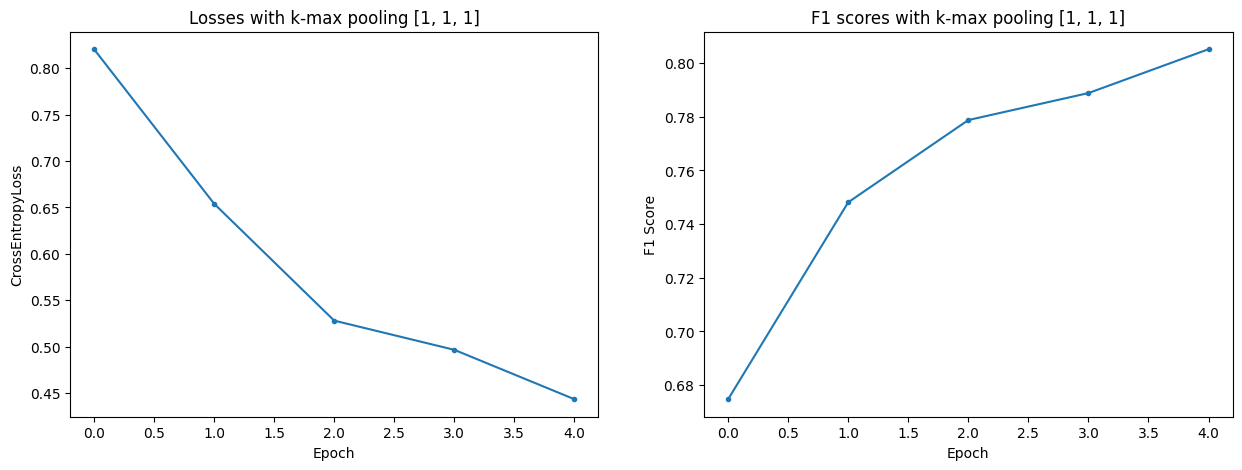

====Current k-max pooling values [5, 5, 5]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.957966   |  0.756013  | 0.638606  | 2.108085 
   2    |   0.679993   |  0.759384  | 0.667837  | 1.860134 
   3    |   0.527977   |  0.555944  | 0.757488  | 1.846537 
   4    |   0.430450   |  0.606132  | 0.741972  | 1.826889 
   5    |   0.362791   |  0.411080  | 0.799702  | 1.837216 
Training complete! Best f1score: 0.799702%.


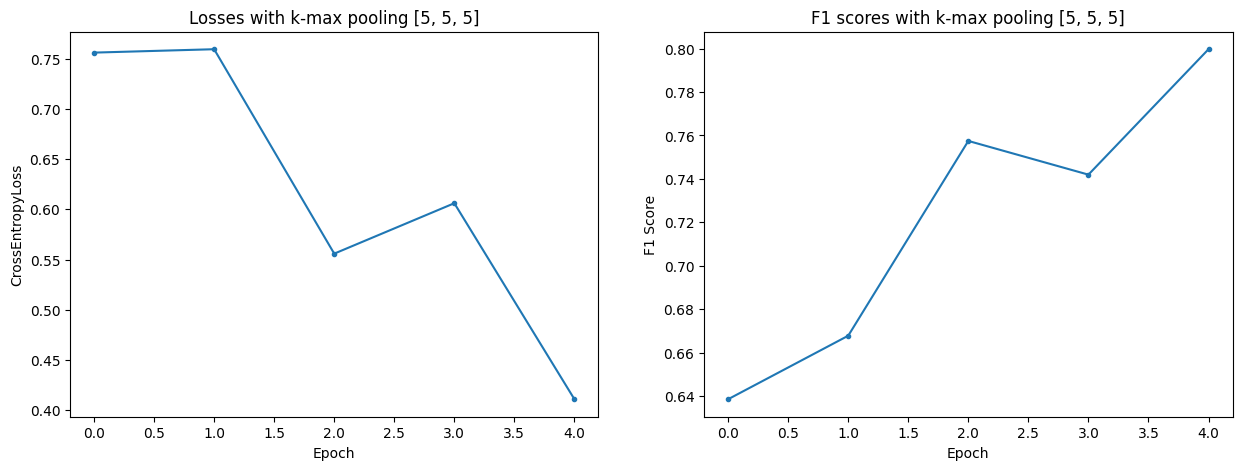

====Current k-max pooling values [10, 10, 10]=====
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.957894   |  0.724609  | 0.608062  | 1.824435 
   2    |   0.706298   |  0.907963  | 0.594333  | 1.998577 
   3    |   0.536982   |  0.618275  | 0.745232  | 2.071533 
   4    |   0.440034   |  0.526028  | 0.751848  | 2.063820 
   5    |   0.370899   |  0.404478  | 0.768339  | 2.085644 
Training complete! Best f1score: 0.768339%.


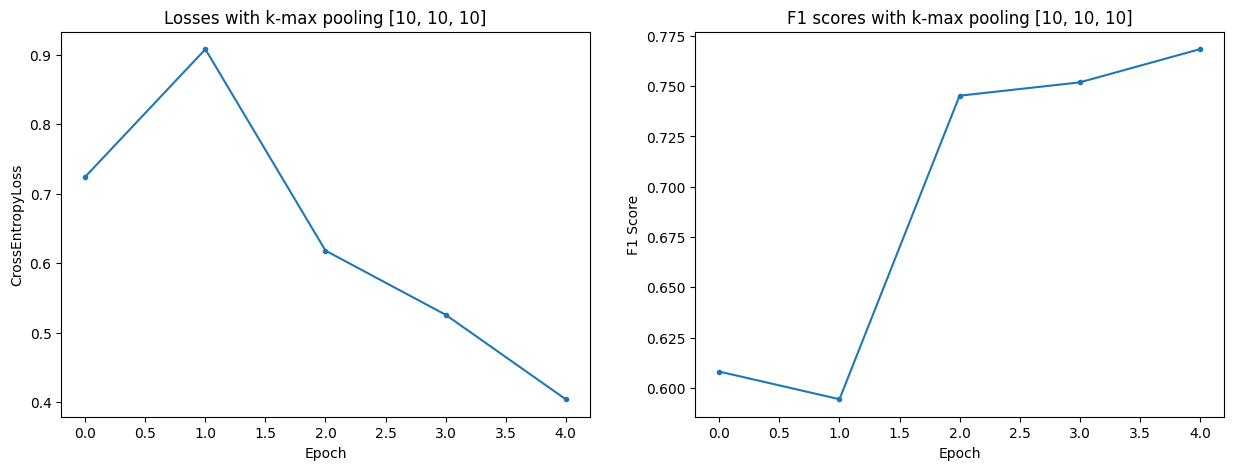

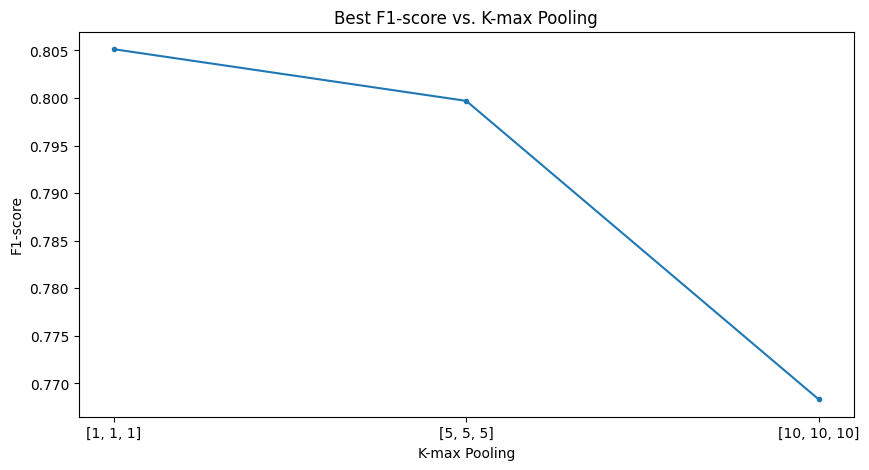

Test loss on the best model: 0.6443860754370689
Test macro F1 score on the best model: 0.6718621528883787


<ipython-input-40-713299d8cf9e>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model = torch.load('best_model_kmax.pt')


In [ ]:
set_seed(42)  # Set seed for reproducibility
epochs = 5  # Number of epochs
kmax_values = [[1, 1, 1], [5, 5, 5], [10, 10, 10]]  # Different k-max values to experiment with

best_scores_kmax = []  # List to store best scores for each k-max setting
max_best_score = 0  # Variable to track the maximum F1-score achieved

# Iterate over each configuration of k-max pooling
for cur_max in kmax_values:
    print(f"====Current k-max pooling values {cur_max}=====")

    # Initialize the model with current k-max pooling values
    cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],  # Fixed filter sizes
                                                num_filters=[10, 10, 10],  # Fixed number of filters
                                                kmax=cur_max,  # Varying k-max pooling values
                                                learning_rate=0.25,
                                                dropout=0.5)

    # Train the model and evaluate on the validation set
    val_losses_kmax, val_scores_kmax, best_score_kmax = train(
        cnn_non_static, optimizer, train_dataloader, dev_dataloader, epochs=epochs)

    # Store the best F1-score for the current k-max configuration
    best_scores_kmax.append(best_score_kmax)

    # Save the best-performing model for k-max pooling
    if best_score_kmax > max_best_score:
        max_best_score = best_score_kmax
        torch.save(cnn_non_static, 'best_model_kmax.pt')

    # Plot losses and F1 scores for the current k-max pooling configuration
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training and validation loss
    axes[0].plot(np.arange(epochs), val_losses_kmax, marker='.')
    axes[0].set_title(f"Losses with k-max pooling {cur_max}")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    # Plot F1 scores
    axes[1].plot(np.arange(epochs), val_scores_kmax, marker='.')
    axes[1].set_title(f"F1 scores with k-max pooling {cur_max}")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 Score")

    plt.show()

# Plot the best F1-scores for each k-max pooling configuration
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(best_scores_kmax)), best_scores_kmax, marker='.')
plt.title("Best F1-score vs. K-max Pooling")
plt.xlabel("K-max Pooling")
plt.ylabel("F1-score")
plt.xticks(np.arange(len(kmax_values)), [str(k) for k in kmax_values])
plt.show()

# Load and evaluate the best model on the test set
best_model = torch.load('best_model_kmax.pt')
best_model.eval()
best_model_test_loss, best_model_test_f1score = evaluate(best_model, test_dataloader)

print("Test loss on the best model:", best_model_test_loss)
print("Test macro F1 score on the best model:", best_model_test_f1score)


Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.919577   |  0.676238  | 0.669574  | 2.884126 
   2    |   0.636092   |  0.587170  | 0.717865  | 2.891698 
   3    |   0.445905   |  0.520041  | 0.726240  | 2.900071 
   4    |   0.342488   |  0.469818  | 0.781154  | 2.736932 
   5    |   0.284172   |  0.358794  | 0.804804  | 2.677655 
Training complete! Best f1score: 0.804804%.


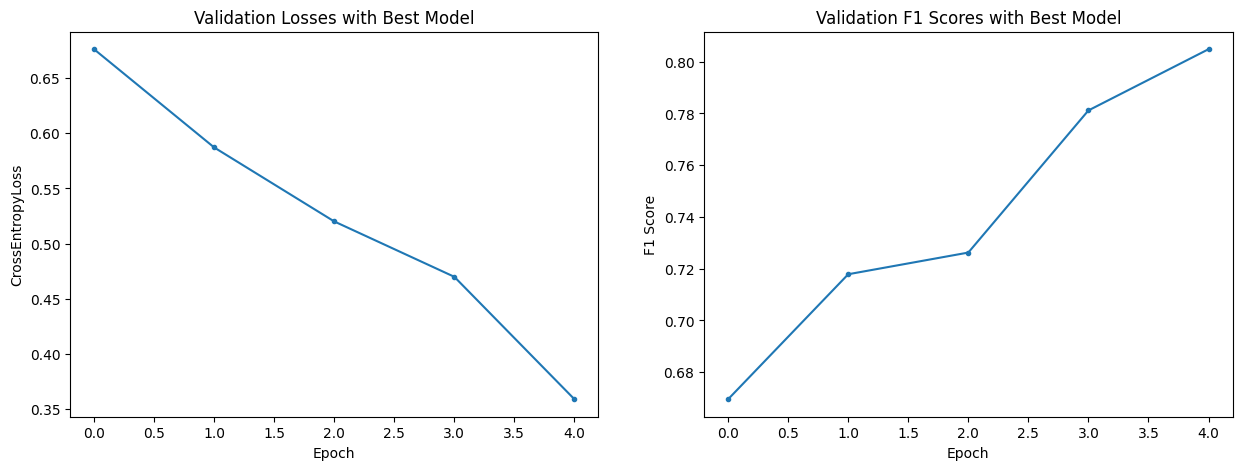

In [ ]:
best_score = 0
cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings,
                                                freeze_embedding=False,
                                                filter_sizes=[6, 7, 8],
                                                num_filters=[100, 100, 100],
                                                kmax=[10, 10, 10],
                                                learning_rate=0.25,
                                                dropout=0.5)

val_losses_all, val_scores_all, best_score_all = train(cnn_non_static, optimizer, train_dataloader, dev_dataloader, epochs=5)

if best_score_all > best_score:
    best_score = best_score_all
    torch.save(cnn_non_static, 'best_model_all.pt')

# Plotting the losses and F1 scores over the epochs
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(np.arange(5), val_losses_all, marker='.')
axes[0].set_title("Validation Losses with Best Model")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("CrossEntropyLoss")

axes[1].plot(np.arange(5), val_scores_all, marker='.')
axes[1].set_title("Validation F1 Scores with Best Model")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("F1 Score")
plt.show()


In [ ]:
# скачиваем WordNet
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def encode(tokenized_texts, word2idx, max_len):
    input_ids = []
    for tokenized_text in tokenized_texts:
        # Ensure tokenized_text is a list of tokens (not a string)
        if isinstance(tokenized_text, str):
            tokenized_text = word_tokenize(tokenized_text)

        # Truncate if longer than max_len
        tokenized_text = tokenized_text[:max_len]

        # Pad with '<pad>' if shorter than max_len
        tokenized_text += ['<pad>'] * (max_len - len(tokenized_text))

        # Convert tokens to their corresponding indices
        input_id = [word2idx.get(token, word2idx['<unk>']) for token in tokenized_text]
        input_ids.append(input_id)

    return input_ids


====current probability 0.3=====
Loading pretrained vectors...


<ipython-input-35-a6f74f76ce7e>:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 10093 / 13098 pretrained vectors found.
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.620194   |  0.635355  | 0.405330  | 2.228664 
   2    |   0.574161   |  0.699377  | 0.405330  | 2.031134 
   3    |   0.568827   |  0.692349  | 0.405330  | 2.054114 
   4    |   0.566967   |  0.695280  | 0.405330  | 2.036253 
   5    |   0.565170   |  0.645296  | 0.405330  | 1.791273 
Training complete! Best f1score: 0.405330%.


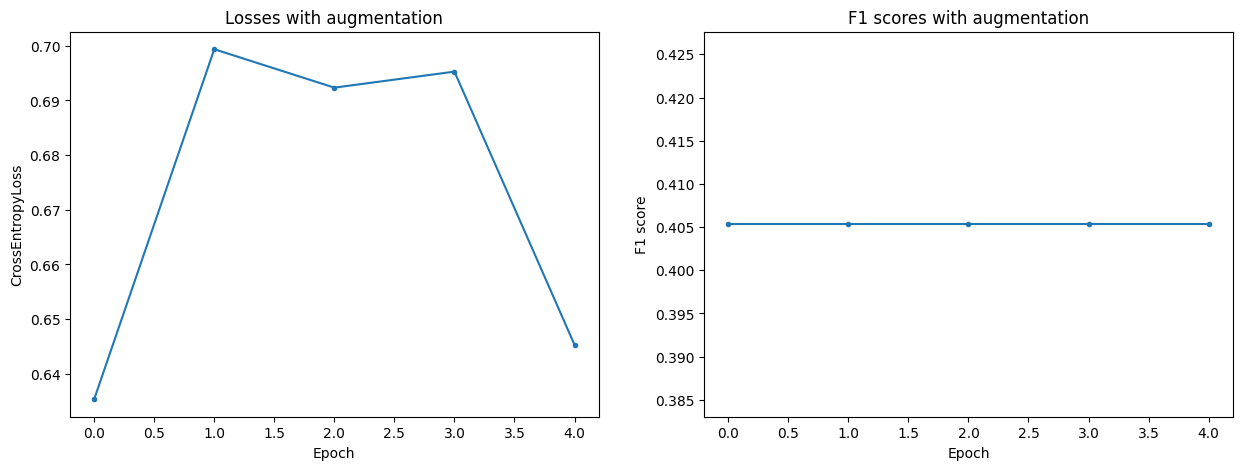

====current probability 0.4=====
Loading pretrained vectors...


<ipython-input-35-a6f74f76ce7e>:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 10417 / 13661 pretrained vectors found.
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.595633   |  0.651660  | 0.405330  | 2.271239 
   2    |   0.554460   |  0.642018  | 0.405330  | 2.210531 
   3    |   0.550663   |  0.677151  | 0.405330  | 2.172033 
   4    |   0.545093   |  0.677580  | 0.405330  | 2.138897 
   5    |   0.538846   |  0.719620  | 0.405330  | 1.819644 
Training complete! Best f1score: 0.405330%.


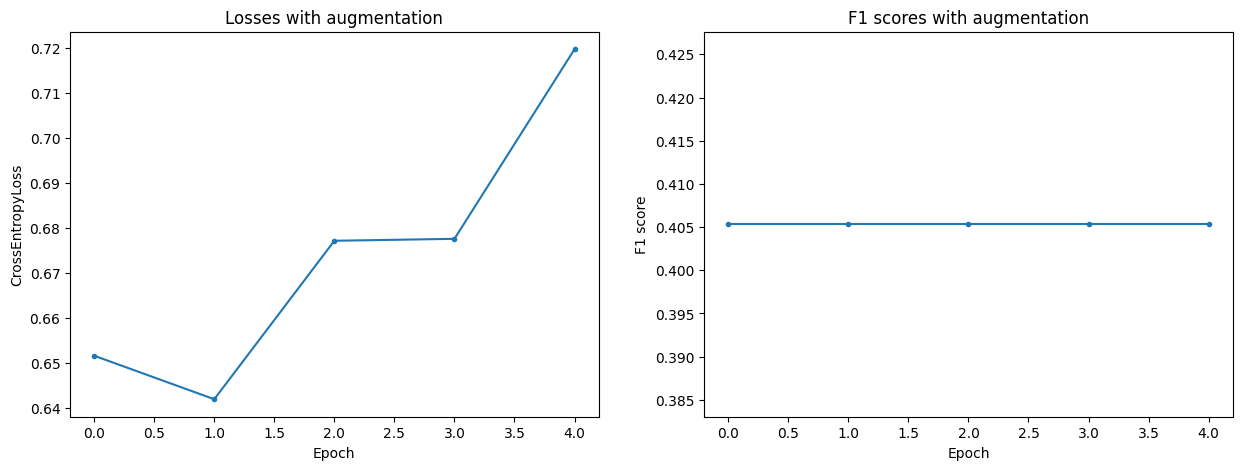

====current probability 0.5=====
Loading pretrained vectors...


<ipython-input-35-a6f74f76ce7e>:81: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(fin):


0it [00:00, ?it/s]

There are 10655 / 14108 pretrained vectors found.
Start training...

 Epoch  |  Train Loss  |  Val Loss  | Val f1-score |  Elapsed 
------------------------------------------------------------
   1    |   0.579577   |  0.627009  | 0.405330  | 2.462429 
   2    |   0.540298   |  0.644566  | 0.405330  | 2.336589 
   3    |   0.529311   |  0.716541  | 0.405330  | 2.353969 
   4    |   0.525346   |  0.685960  | 0.405330  | 2.081941 
   5    |   0.521990   |  0.622389  | 0.405156  | 1.960624 
Training complete! Best f1score: 0.405330%.


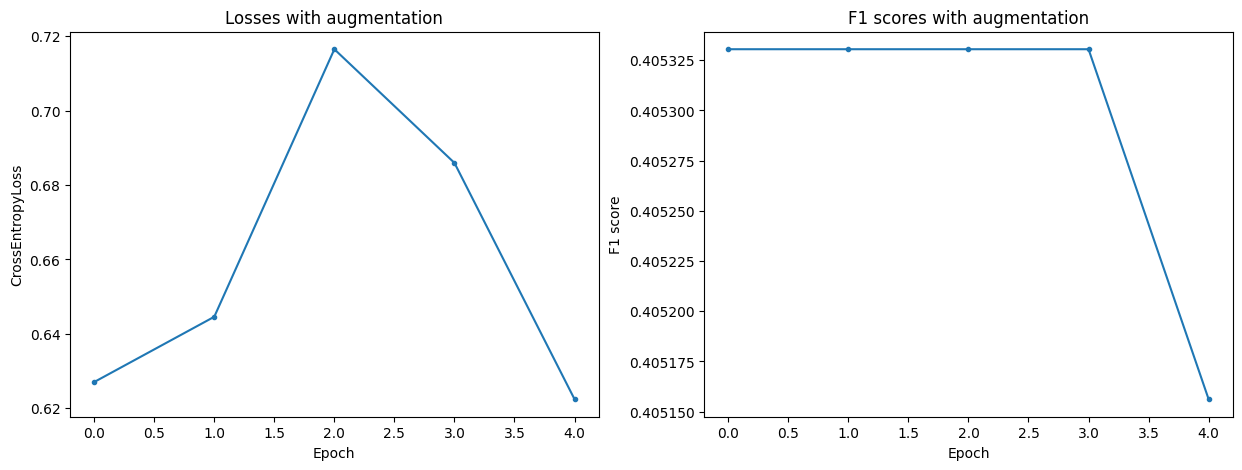

In [ ]:
# Ensure necessary libraries are imported
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming you already have train_x, train_y, dev_x, dev_y, test_x, test_y

# Noise words like stopwords
noise = stopwords.words('english')

def tokenize_augmentation(texts, answers, prob):
    max_len = 0
    tokenized_texts = []
    answers_aug = answers.copy()
    word2idx = {}

    # Add <pad> and <unk> tokens to the vocabulary
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1

    idx = 2  # Starting index for the vocabulary
    for text in texts:
        tokenized_text = word_tokenize(text)
        tokenized_texts.append(tokenized_text)

        # Add new tokens to word2idx
        for token in tokenized_text:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        max_len = max(max_len, len(tokenized_text))

        # Apply augmentation with a given probability
        if np.random.uniform() < prob:
            funcs_aug = [[synonym_replacement, 10], [random_insertion, 10], [random_deletion, 0.2], [random_swap, 10]]
            rand_func = funcs_aug[np.random.randint(len(funcs_aug))]
            text_aug = rand_func[0](tokenized_text, rand_func[1])
            answers_aug.append(answers_aug[-1])  # Keep the same label for augmented text
            tokenized_texts.append(text_aug)

            for token in text_aug:
                if token not in word2idx:
                    word2idx[token] = idx
                    idx += 1

    return tokenized_texts, answers_aug, word2idx, max_len

def get_synonyms(token):
    synonyms = set()
    for syn in wn.synsets(token):
        for l in syn.lemma_names():
            synonym = l.replace("_", " ").replace("-", " ").lower()
            synonyms.add(synonym)
    if token in synonyms:
        synonyms.remove(token)
    return list(synonyms)

def synonym_replacement(text, n):
    text = text.copy()
    max_iters = min(n * 3, len(text))
    for _ in range(max_iters):
        i = np.random.randint(len(text))
        token = text[i]
        if token not in noise and token.isalpha():
            synonyms = get_synonyms(token)
            if len(synonyms) > 0:
                text[i] = np.random.choice(synonyms)
                n -= 1
        if n == 0:
            break
    return text

def random_insertion(text, n):
    text = text.copy()
    for _ in range(n):
        token = text[np.random.randint(len(text))]
        if token not in noise and token.isalpha():
            synonyms = get_synonyms(token)
            if len(synonyms) > 0:
                text.insert(np.random.randint(len(text)), np.random.choice(synonyms))
                n -= 1
        if n == 0:
            break
    return text

def random_deletion(text, p):
    new_text = [token for token in text if np.random.uniform() > p]
    if len(new_text) == 0:
        new_text.append(np.random.choice(text))
    return new_text

def random_swap(text, n):
    text = text.copy()
    for _ in range(n):
        idx1, idx2 = np.random.randint(len(text)), np.random.randint(len(text))
        text[idx1], text[idx2] = text[idx2], text[idx1]
    return text

def create_aug_dataloaders(tokenized_texts_train, train_y, word2idx, max_len, dev_x, dev_y, test_x, test_y, batch_size):
    train_inputs = encode(tokenized_texts_train, word2idx, max_len)
    dev_inputs = encode(dev_x, word2idx, max_len)  # Changed to dev_x
    test_inputs = encode(test_x, word2idx, max_len)  # Changed to test_x

    # Load pretrained vectors
    embeddings = load_pretrained_vectors(word2idx, "fastTextVectors/crawl-300d-2M.vec")
    embeddings = torch.tensor(embeddings)

    # Prepare labels
    train_labels = [1 if label == 'positive' else 0 for label in train_y]
    dev_labels = [1 if label == 'positive' else 0 for label in dev_y]  # For dev set
    test_labels = [1 if label == 'positive' else 0 for label in test_y]  # For test set

    # Convert to tensors
    train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels = \
        tuple(torch.tensor(data) for data in
              [train_inputs, dev_inputs, test_inputs, train_labels, dev_labels, test_labels])

    # Create dataloaders
    train_data = TensorDataset(train_inputs, train_labels)
    train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

    dev_data = TensorDataset(dev_inputs, dev_labels)
    dev_dataloader = DataLoader(dev_data, shuffle=False, batch_size=batch_size)

    test_data = TensorDataset(test_inputs, test_labels)
    test_dataloader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

    return embeddings, train_dataloader, dev_dataloader, test_dataloader


# Hyperparameters
epochs = 5
batch_size = 64
probabilities = [0.3, 0.4, 0.5]

set_seed(42)
best_scores_aug = []
max_best_score = 0
best_test_dataloader_aug = None

# Training loop with augmentation
for prob in probabilities:
    print("====current probability {}=====".format(prob))
    tokenized_texts_train_aug, train_y_aug, word2idx_aug, max_len_aug = tokenize_augmentation(list(train_x), list(train_y), prob)
    embeddings_aug, train_dataloader_aug, dev_dataloader_aug, test_dataloader_aug = create_aug_dataloaders(
        tokenized_texts_train_aug, train_y_aug, word2idx_aug, max_len_aug, dev_x, dev_y, test_x, test_y, batch_size)

    cnn_non_static, optimizer = initilize_model(pretrained_embedding=embeddings_aug,  # Use embeddings here
                                            freeze_embedding=False,
                                            filter_sizes=[6, 7, 8],
                                            num_filters=[10, 10, 10],
                                            kmax=[10, 10, 10],
                                            learning_rate=0.25,
                                            dropout=0.5)


    val_losses_aug, val_scores_aug, best_score_aug = train(
        cnn_non_static, optimizer, train_dataloader_aug, dev_dataloader_aug, epochs=epochs)
    best_scores_aug.append(best_score_aug)

    if best_score_aug > max_best_score:
        max_best_score = best_score_aug
        torch.save(cnn_non_static, 'best_model_aug.pt')
        best_test_dataloader_aug = test_dataloader_aug

    # Plot results for losses and f1-scores
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(np.arange(epochs), val_losses_aug, marker='.')
    axes[0].set_title("Losses with augmentation")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("CrossEntropyLoss")

    axes[1].plot(np.arange(epochs), val_scores_aug, marker='.')
    axes[1].set_title("F1 scores with augmentation")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("F1 score")
    plt.show()


## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.